<a href="https://colab.research.google.com/github/LucasCarmoPaschoal/Afinador_de_Violao_PDS/blob/main/Afinador_de_Violao_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
# 1. Faça upload de um arquivo .wav ou .mp3 da corda tocada
uploaded = files.upload()

# 2. Pegue o nome do arquivo enviado (exemplo: "corda1.wav")
arquivo = list(uploaded.keys())[0]


Saving corda3.mp3 to corda3.mp3



Afinando corda 3: D3 (146.80 Hz)
Filtro passa-baixa aplicado: até 190.84 Hz



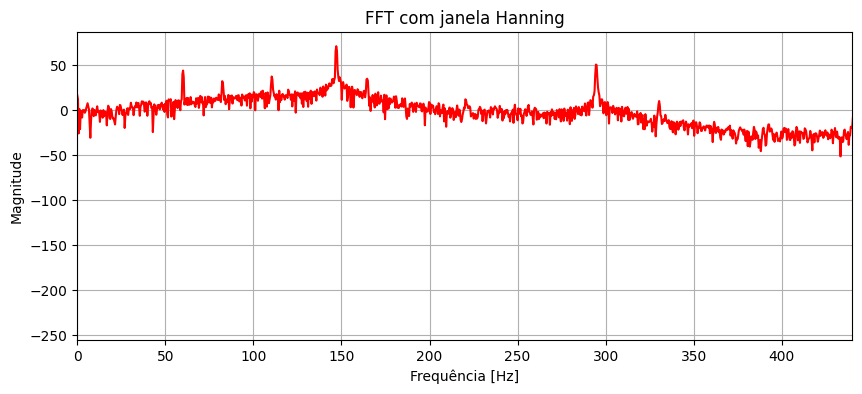

Frequência detectada: 147.04 Hz
Nota alvo: D3 (146.80 Hz)
✅ Corda afinada!


In [ ]:
import numpy as np
import librosa
from scipy.signal import butter, lfilter
from google.colab import files
import matplotlib.pyplot as plt

# -------------------------
# Notas padrão do violão (cordas soltas)
cordas_freq = {
    6: ("E4", 329.60),  # 6ª corda
    5: ("B3", 246.90),  # 5ª corda
    4: ("G3", 196.00),  # 4ª corda
    3: ("D3", 146.80),  # 3ª corda
    2: ("A2", 110.00),  # 2ª corda
    1: ("E2", 82.40),   # 1ª corda
}

# -------------------------
# Filtro passa-baixa
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low')
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# -------------------------
# Detecta frequência usando FFT
def detectar_frequencia(audio, fs, limiar=0.05, plot=True):
    N = len(audio)
    janela = np.hanning(N)
    fft = np.fft.rfft(audio * janela)
    magnitude = np.abs(fft)

    max_amp = np.max(magnitude)
    if max_amp < limiar:
        return None, max_amp

    freqs = np.fft.rfftfreq(N, 1/fs)
    idx_max = np.argmax(magnitude)
    freq_detectada = freqs[idx_max]
    magnitude_db = 20 * np.log10(magnitude + 1e-12 )
    # PLOT FFT
    if plot:
        plt.figure(figsize=(10,4))
        plt.plot(freqs, magnitude_db, color="red")
        plt.title("FFT com janela Hanning")
        plt.xlabel("Frequência [Hz]")
        plt.ylabel("Magnitude")
        plt.xlim(0,440)
        plt.grid(True)
        plt.show()

    return freq_detectada,max_amp

# -------------------------
# Afinador a partir de arquivo
def afinador(corda, arquivo):
    nota_alvo, freq_alvo = cordas_freq[corda]
    cutoff = freq_alvo * 1.3

    print(f"\nAfinando corda {corda}: {nota_alvo} ({freq_alvo:.2f} Hz)")
    print(f"Filtro passa-baixa aplicado: até {cutoff:.2f} Hz\n")

    # Carrega arquivo (MP3 ou WAV)
    y, sr = librosa.load(arquivo, sr=None, mono=True)

    # Usa apenas os primeiros 4 segundos
    if len(y) > sr*4:
        y = y[:sr*4]

    # Aplica filtro passa-baixa
    audio_filtrado = lowpass_filter(y, cutoff, sr)

    # Detecta frequência
    freq, max_amp = detectar_frequencia(audio_filtrado, sr)

    # Detecta Silencio
    if freq is None:
        print("Silêncio ou som fraco no arquivo.")
        return


    print(f"Frequência detectada: {freq:.2f} Hz")
    print(f"Nota alvo: {nota_alvo} ({freq_alvo:.2f} Hz)")

    # Instrução de afinação
    if freq > freq_alvo + 1:
        print("Corda tensa → SOLTAR")
    elif freq < freq_alvo - 1:
        print("Corda frouxa → APERTAR")
    else:
        print("✅ Corda afinada!")

# -------------------------
# Teste
afinador(3,arquivo)

